Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```

---

#### Getting Started

This exercise will give a short introduction into the framework Keras (https://keras.io/) and the back-end Tensorflow (https://www.tensorflow.org/) to build small and large neural networks.
 
Keras is a high-level neural networks  API developed with a focus on enabling fast experimen tation. Being able to go from idea to result with the least possible delay is key to doing proper research. Further key features are:

* Allows the same code to run on CPU or GPU, seamlessly.
* User-friendly API which makes it easy to quickly prototype deep learning models.
* Built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* Supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, etc. This means that Keras is appropriate for building essentially any deep learning model, from a memory network to a neural Turing machine. 

Tensorflow is a low-level neural network library using a computational graph and sessions on this graph to execute mathematical operations. It further enables the use of CPU and GPU for computations. Tensorflow incorporates the key features from Keras above but lacks the user-friendly API, instead provides a way to intervene a bit easier in the computational graph during execution time.

__Please install `tensorflow` and `keras`__

#### More Information: 
 
Keras is rather straightforward, and you need just a few things to know how you build and train a model. Further information: https://github.com/keras-team/keras#getting-started-30-seconds-to-keras. The things you need to know are:

1. How to create a model. 
2. How to select an optimizer, a loss function and a metric. 
3. How to train the model on data. 
4. How to predict. 
---

#### Exercise 1:  Build your first small Neural Network - _(20 points)_

__In this exercise we will use a Neural Network on a real data set. We will classify the digits dataset (MINST)__

You are allowed to use the following packages only.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


##### __(a) Load the MNIST dataset. Split dataset into a training (80% rows) and test (20% rows) data.__
_(Hint: use the `dataset_mnist()` from the Keras library)_

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

##### __(b) Reshape and normalize the training and test data (28x28) into a 1d numpy array.__

In [3]:
x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)
# Reshaping is performed in the model's layers

##### __(c) Convert the class vectors to a binary class matrix (One-Hot encoding).__
_(Hint: use the `keras.utils.to_categorical` from the Keras library)_

In [4]:
y_train_matrix = keras.utils.to_categorical(y_train)
y_test_matrix = keras.utils.to_categorical(y_test)

##### __(d) Build a small neural network with three layers.__
_(Hint: Use the `relu` actication function for the 1-2 layer and a `softmax` for the third layer.)_

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

##### __(e) Use as the loss function `mean_squared_error` and as the optimizes use `optimizers.SGD`.__

In [6]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['acc'])

##### __(f) Train the neural network on the training data set and predict the test data set.__
_(Hint: Train the network with  20 epochs.)_

In [7]:
dnn = model.fit(x_train, y_train_matrix, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0896 - acc: 0.1510 - val_loss: 0.0893 - val_acc: 0.1686
Epoch 2/20
48000/48000 [==============================] - 4s 82us/step - loss: 0.0891 - acc: 0.1912 - val_loss: 0.0887 - val_acc: 0.2167
Epoch 3/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.0884 - acc: 0.2327 - val_loss: 0.0880 - val_acc: 0.2559
Epoch 4/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0876 - acc: 0.2693 - val_loss: 0.0870 - val_acc: 0.2932
Epoch 5/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.0865 - acc: 0.3065 - val_loss: 0.0858 - val_acc: 0.3315
Epoch 6/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.0853 - acc: 0.3449 - val_loss: 0.0844 - val_acc: 0.3714
Epoch 7/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.0838 - acc: 0.3831 - val_loss: 0.0826 - val_ac

##### __(g) Plot training and validation accuracy values.__

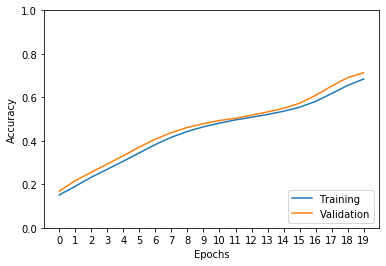

In [8]:
plt.plot(dnn.history['acc'])
plt.plot(dnn.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.ylabel('Accuracy')
plt.ylim((0,1))
plt.xlabel('Epochs')
plt.xticks(range(20))
plt.show()

##### __(h) Change the optimizer to `optimizers.Adam` and retrain.__
_(Hint: Train the network with  20 epochs.)_

In [9]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['acc'])

dnn2 = model2.fit(x_train, y_train_matrix, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.0191 - acc: 0.8763 - val_loss: 0.0104 - val_acc: 0.9317
Epoch 2/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.0094 - acc: 0.9400 - val_loss: 0.0087 - val_acc: 0.9448
Epoch 3/20
48000/48000 [==============================] - 4s 92us/step - loss: 0.0076 - acc: 0.9517 - val_loss: 0.0079 - val_acc: 0.9498
Epoch 4/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0065 - acc: 0.9592 - val_loss: 0.0073 - val_acc: 0.9523
Epoch 5/20
48000/48000 [==============================] - 4s 92us/step - loss: 0.0058 - acc: 0.9638 - val_loss: 0.0071 - val_acc: 0.9529
Epoch 6/20
48000/48000 [==============================] - 5s 100us/step - loss: 0.0052 - acc: 0.9675 - val_loss: 0.0064 - val_acc: 0.9583
Epoch 7/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0046 - acc: 0.9722 - val_loss: 0.0065 - val_ac

##### __(i) Plot training and validation accuracy values for the new model.__

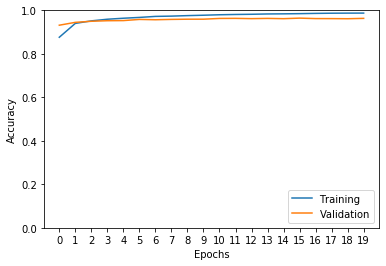

In [10]:
plt.plot(dnn2.history['acc'])
plt.plot(dnn2.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.ylabel('Accuracy')
plt.ylim((0,1))
plt.xlabel('Epochs')
plt.xticks(range(20))
plt.show()

##### __(j) Compare the results of the two trained models and discuss the results.__

> Obviously, optimizer adam does create a way better  
> accuracy from the beginning. Therefore, it cannot  
> grow that much as compared to SGD. The accuracy rises,  
> even though in there as well growth reduces gradually.  
>
> Due to the way better accuracy, I think that adam as  
> an optimizer should be used in this case.

> (Validation is always more accurate than the training in SGD,  
> while that is reversed (most completely) when using adam.  
> This is further discussed in the next section.)

##### __(k) Do you see overfitting in the history?__

> Since the accuracy-score of the training data is higher  
> (at least from the third epoch on) than the validation's  
> overfitting might be a problem. But due to the very small  
> delta between the two curves, I do not think one can state  
> that being a serious problem in here.

---